[View in Colaboratory](https://colab.research.google.com/github/psm1996/CIFAR-10/blob/master/CIFAR_10_USING_KERAS.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8

Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up gnupg (2.1.15-1ubuntu8.1) 

In [2]:
4/AAD-WONBcQdgN4AQNVqhRZxwqLPP-iAf0dPgnAQSIwwA0DD5EcMzpmUfrom google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [21]:
!mkdir -p drive
!google-drive-ocamlfuse drive


fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [22]:
!pip install keras_sequential_ascii

  Running setup.py bdist_wheel for keras-sequential-ascii ... - done
  Stored in directory: /content/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
# x_train - training data(images), y_train - labels(digits)

In [0]:
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 100 # repeat 100 times

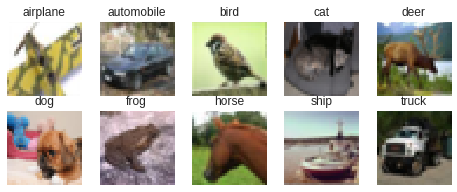

In [34]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [38]:


def base_model():
 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
 
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
 
# Train model
 
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()
 
# Fit model
 
cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_30 (Activation)   (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 15, 15)        18496     
__________

50000/50000 [==============================] - 29s 572us/step - loss: 1.8138 - acc: 0.3399 - val_loss: 1.6522 - val_acc: 0.4061
Epoch 2/100
28672/50000 [================>.............] - ETA: 11s - loss: 1.5736 - acc: 0.4309

50000/50000 [==============================] - 28s 556us/step - loss: 1.5318 - acc: 0.4459 - val_loss: 1.4156 - val_acc: 0.4931
Epoch 3/100
38720/50000 [======================>.......] - ETA: 5s - loss: 1.4047 - acc: 0.4934

50000/50000 [==============================] - 28s 557us/step - loss: 1.3917 - acc: 0.4991 - val_loss: 1.3252 - val_acc: 0.5308
Epoch 4/100
42816/50000 [========================>.....] - ETA: 3s - loss: 1.2959 - acc: 0.5348

50000/50000 [==============================] - 28s 555us/step - loss: 1.2938 - acc: 0.5368 - val_loss: 1.1950 - val_acc: 0.5763
Epoch 5/100
44160/50000 [=========================>....] - ETA: 3s - loss: 1.2091 - acc: 0.5707

50000/50000 [==============================] - 28s 555us/step - loss: 1.2074 - acc: 0.5714 - val_loss: 1.0941 - val_acc: 0.6127
Epoch 6/100
43776/50000 [=========================>....] - ETA: 3s - loss: 1.1402 - acc: 0.5971

50000/50000 [==============================] - 28s 558us/step - loss: 1.1371 - acc: 0.5985 - val_loss: 1.0383 - val_acc: 0.6357
Epoch 7/100
44480/50000 [=========================>....] - ETA: 2s - loss: 1.0786 - acc: 0.6210

50000/50000 [==============================] - 28s 555us/step - loss: 1.0758 - acc: 0.6226 - val_loss: 1.0021 - val_acc: 0.6471
Epoch 8/100
44960/50000 [=========================>....] - ETA: 2s - loss: 1.0271 - acc: 0.6385

50000/50000 [==============================] - 28s 556us/step - loss: 1.0253 - acc: 0.6384 - val_loss: 0.9589 - val_acc: 0.6656
Epoch 9/100
44768/50000 [=========================>....] - ETA: 2s - loss: 0.9868 - acc: 0.6546

50000/50000 [==============================] - 28s 557us/step - loss: 0.9836 - acc: 0.6564 - val_loss: 0.8939 - val_acc: 0.6874
Epoch 10/100
44160/50000 [=========================>....] - ETA: 3s - loss: 0.9451 - acc: 0.6727

50000/50000 [==============================] - 28s 556us/step - loss: 0.9444 - acc: 0.6731 - val_loss: 0.8915 - val_acc: 0.6897
Epoch 11/100
44896/50000 [=========================>....] - ETA: 2s - loss: 0.9131 - acc: 0.6826

50000/50000 [==============================] - 28s 554us/step - loss: 0.9111 - acc: 0.6833 - val_loss: 0.8527 - val_acc: 0.7089
Epoch 12/100
44224/50000 [=========================>....] - ETA: 3s - loss: 0.8814 - acc: 0.6936

50000/50000 [==============================] - 28s 556us/step - loss: 0.8816 - acc: 0.6939 - val_loss: 0.8302 - val_acc: 0.7115
Epoch 13/100
45216/50000 [==========================>...] - ETA: 2s - loss: 0.8584 - acc: 0.7021

50000/50000 [==============================] - 28s 553us/step - loss: 0.8580 - acc: 0.7024 - val_loss: 0.8181 - val_acc: 0.7158
Epoch 14/100
46176/50000 [==========================>...] - ETA: 1s - loss: 0.8343 - acc: 0.7106

50000/50000 [==============================] - 28s 551us/step - loss: 0.8351 - acc: 0.7101 - val_loss: 0.7965 - val_acc: 0.7244
Epoch 15/100
45408/50000 [==========================>...] - ETA: 2s - loss: 0.8173 - acc: 0.7164

50000/50000 [==============================] - 28s 554us/step - loss: 0.8181 - acc: 0.7157 - val_loss: 0.7953 - val_acc: 0.7265
Epoch 16/100
45696/50000 [==========================>...] - ETA: 2s - loss: 0.7991 - acc: 0.7237

50000/50000 [==============================] - 28s 552us/step - loss: 0.8009 - acc: 0.7229 - val_loss: 0.7889 - val_acc: 0.7294
Epoch 17/100
44864/50000 [=========================>....] - ETA: 2s - loss: 0.7839 - acc: 0.7292

50000/50000 [==============================] - 28s 556us/step - loss: 0.7830 - acc: 0.7300 - val_loss: 0.7760 - val_acc: 0.7334
Epoch 18/100
43872/50000 [=========================>....] - ETA: 3s - loss: 0.7672 - acc: 0.7359

50000/50000 [==============================] - 28s 559us/step - loss: 0.7674 - acc: 0.7353 - val_loss: 0.7624 - val_acc: 0.7327
Epoch 19/100
44544/50000 [=========================>....] - ETA: 2s - loss: 0.7569 - acc: 0.7381

50000/50000 [==============================] - 28s 555us/step - loss: 0.7579 - acc: 0.7380 - val_loss: 0.7815 - val_acc: 0.7282
Epoch 20/100
45376/50000 [==========================>...] - ETA: 2s - loss: 0.7443 - acc: 0.7424

50000/50000 [==============================] - 28s 555us/step - loss: 0.7464 - acc: 0.7418 - val_loss: 0.7422 - val_acc: 0.7477
Epoch 21/100
45280/50000 [==========================>...] - ETA: 2s - loss: 0.7365 - acc: 0.7464

50000/50000 [==============================] - 28s 554us/step - loss: 0.7373 - acc: 0.7467 - val_loss: 0.7315 - val_acc: 0.7480
Epoch 22/100
44576/50000 [=========================>....] - ETA: 2s - loss: 0.7231 - acc: 0.7486

50000/50000 [==============================] - 28s 556us/step - loss: 0.7241 - acc: 0.7480 - val_loss: 0.7409 - val_acc: 0.7426
Epoch 23/100
43072/50000 [========================>.....] - ETA: 3s - loss: 0.7166 - acc: 0.7527

50000/50000 [==============================] - 28s 559us/step - loss: 0.7166 - acc: 0.7534 - val_loss: 0.7255 - val_acc: 0.7522
Epoch 24/100
43456/50000 [=========================>....] - ETA: 3s - loss: 0.7077 - acc: 0.7586

50000/50000 [==============================] - 28s 557us/step - loss: 0.7095 - acc: 0.7581 - val_loss: 0.7060 - val_acc: 0.7606
Epoch 25/100
44096/50000 [=========================>....] - ETA: 3s - loss: 0.7017 - acc: 0.7599

50000/50000 [==============================] - 28s 556us/step - loss: 0.7021 - acc: 0.7601 - val_loss: 0.7125 - val_acc: 0.7618
Epoch 26/100
44608/50000 [=========================>....] - ETA: 2s - loss: 0.6952 - acc: 0.7634

50000/50000 [==============================] - 28s 557us/step - loss: 0.6967 - acc: 0.7633 - val_loss: 0.6930 - val_acc: 0.7635
Epoch 27/100
44416/50000 [=========================>....] - ETA: 2s - loss: 0.6961 - acc: 0.7623

50000/50000 [==============================] - 28s 555us/step - loss: 0.6956 - acc: 0.7626 - val_loss: 0.7116 - val_acc: 0.7609
Epoch 28/100
44224/50000 [=========================>....] - ETA: 3s - loss: 0.6878 - acc: 0.7643

50000/50000 [==============================] - 28s 557us/step - loss: 0.6865 - acc: 0.7654 - val_loss: 0.6959 - val_acc: 0.7637
Epoch 29/100
45504/50000 [==========================>...] - ETA: 2s - loss: 0.6829 - acc: 0.7684

50000/50000 [==============================] - 28s 553us/step - loss: 0.6830 - acc: 0.7684 - val_loss: 0.7162 - val_acc: 0.7603
Epoch 30/100
44480/50000 [=========================>....] - ETA: 2s - loss: 0.6802 - acc: 0.7700

50000/50000 [==============================] - 28s 557us/step - loss: 0.6817 - acc: 0.7692 - val_loss: 0.7043 - val_acc: 0.7725
Epoch 31/100
47264/50000 [===========================>..] - ETA: 1s - loss: 0.6767 - acc: 0.7704

50000/50000 [==============================] - 27s 543us/step - loss: 0.6759 - acc: 0.7708 - val_loss: 0.6965 - val_acc: 0.7636
Epoch 32/100
49376/50000 [============================>.] - ETA: 0s - loss: 0.6754 - acc: 0.7718

50000/50000 [==============================] - 27s 542us/step - loss: 0.6752 - acc: 0.7718 - val_loss: 0.6763 - val_acc: 0.7722
Epoch 33/100
49088/50000 [============================>.] - ETA: 0s - loss: 0.6707 - acc: 0.7750

50000/50000 [==============================] - 27s 545us/step - loss: 0.6710 - acc: 0.7749 - val_loss: 0.6691 - val_acc: 0.7704
Epoch 34/100
49568/50000 [============================>.] - ETA: 0s - loss: 0.6689 - acc: 0.7753

50000/50000 [==============================] - 27s 543us/step - loss: 0.6687 - acc: 0.7754 - val_loss: 0.6844 - val_acc: 0.7687
Epoch 35/100
49280/50000 [============================>.] - ETA: 0s - loss: 0.6660 - acc: 0.7736

50000/50000 [==============================] - 27s 544us/step - loss: 0.6655 - acc: 0.7738 - val_loss: 0.6724 - val_acc: 0.7743
Epoch 36/100
49984/50000 [============================>.] - ETA: 0s - loss: 0.6599 - acc: 0.7765

50000/50000 [==============================] - 27s 542us/step - loss: 0.6599 - acc: 0.7766 - val_loss: 0.6541 - val_acc: 0.7814
Epoch 37/100
48224/50000 [===========================>..] - ETA: 0s - loss: 0.6614 - acc: 0.7774

50000/50000 [==============================] - 27s 548us/step - loss: 0.6621 - acc: 0.7775 - val_loss: 0.6928 - val_acc: 0.7632
Epoch 38/100
48672/50000 [============================>.] - ETA: 0s - loss: 0.6628 - acc: 0.7764

50000/50000 [==============================] - 27s 545us/step - loss: 0.6636 - acc: 0.7763 - val_loss: 0.6859 - val_acc: 0.7736
Epoch 39/100
48832/50000 [============================>.] - ETA: 0s - loss: 0.6523 - acc: 0.7820

50000/50000 [==============================] - 27s 546us/step - loss: 0.6526 - acc: 0.7817 - val_loss: 0.6845 - val_acc: 0.7725
Epoch 40/100
48000/50000 [===========================>..] - ETA: 1s - loss: 0.6565 - acc: 0.7794

50000/50000 [==============================] - 27s 549us/step - loss: 0.6574 - acc: 0.7792 - val_loss: 0.7146 - val_acc: 0.7719
Epoch 41/100
46400/50000 [==========================>...] - ETA: 1s - loss: 0.6541 - acc: 0.7814

50000/50000 [==============================] - 28s 554us/step - loss: 0.6541 - acc: 0.7814 - val_loss: 0.6779 - val_acc: 0.7739
Epoch 42/100
46432/50000 [==========================>...] - ETA: 1s - loss: 0.6581 - acc: 0.7810

50000/50000 [==============================] - 28s 551us/step - loss: 0.6571 - acc: 0.7806 - val_loss: 0.6625 - val_acc: 0.7760
Epoch 43/100
45856/50000 [==========================>...] - ETA: 2s - loss: 0.6527 - acc: 0.7822

50000/50000 [==============================] - 28s 554us/step - loss: 0.6513 - acc: 0.7824 - val_loss: 0.6669 - val_acc: 0.7785
Epoch 44/100
46208/50000 [==========================>...] - ETA: 1s - loss: 0.6513 - acc: 0.7835

50000/50000 [==============================] - 28s 550us/step - loss: 0.6506 - acc: 0.7833 - val_loss: 0.6590 - val_acc: 0.7763
Epoch 45/100
47104/50000 [===========================>..] - ETA: 1s - loss: 0.6468 - acc: 0.7829

50000/50000 [==============================] - 27s 549us/step - loss: 0.6454 - acc: 0.7833 - val_loss: 0.6405 - val_acc: 0.7866
Epoch 46/100
46656/50000 [==========================>...] - ETA: 1s - loss: 0.6414 - acc: 0.7856

50000/50000 [==============================] - 28s 551us/step - loss: 0.6439 - acc: 0.7845 - val_loss: 0.7333 - val_acc: 0.7508
Epoch 47/100
47168/50000 [===========================>..] - ETA: 1s - loss: 0.6459 - acc: 0.7859

50000/50000 [==============================] - 27s 549us/step - loss: 0.6471 - acc: 0.7847 - val_loss: 0.6518 - val_acc: 0.7788
Epoch 48/100
47936/50000 [===========================>..] - ETA: 1s - loss: 0.6444 - acc: 0.7865

50000/50000 [==============================] - 27s 547us/step - loss: 0.6436 - acc: 0.7867 - val_loss: 0.6534 - val_acc: 0.7797
Epoch 49/100
47456/50000 [===========================>..] - ETA: 1s - loss: 0.6337 - acc: 0.7896

50000/50000 [==============================] - 27s 548us/step - loss: 0.6349 - acc: 0.7892 - val_loss: 0.6839 - val_acc: 0.7743
Epoch 50/100
47136/50000 [===========================>..] - ETA: 1s - loss: 0.6306 - acc: 0.7902

50000/50000 [==============================] - 28s 551us/step - loss: 0.6328 - acc: 0.7902 - val_loss: 0.7139 - val_acc: 0.7714
Epoch 51/100
47168/50000 [===========================>..] - ETA: 1s - loss: 0.6364 - acc: 0.7863

50000/50000 [==============================] - 27s 550us/step - loss: 0.6365 - acc: 0.7856 - val_loss: 0.6752 - val_acc: 0.7711
Epoch 52/100
47008/50000 [===========================>..] - ETA: 1s - loss: 0.6350 - acc: 0.7887

50000/50000 [==============================] - 27s 550us/step - loss: 0.6380 - acc: 0.7882 - val_loss: 0.6688 - val_acc: 0.7765
Epoch 53/100
47552/50000 [===========================>..] - ETA: 1s - loss: 0.6361 - acc: 0.7895

50000/50000 [==============================] - 27s 549us/step - loss: 0.6368 - acc: 0.7895 - val_loss: 0.6451 - val_acc: 0.7860
Epoch 54/100
47008/50000 [===========================>..] - ETA: 1s - loss: 0.6370 - acc: 0.7907

50000/50000 [==============================] - 28s 551us/step - loss: 0.6374 - acc: 0.7908 - val_loss: 0.6659 - val_acc: 0.7757
Epoch 55/100
47680/50000 [===========================>..] - ETA: 1s - loss: 0.6341 - acc: 0.7887

50000/50000 [==============================] - 27s 548us/step - loss: 0.6350 - acc: 0.7885 - val_loss: 0.6868 - val_acc: 0.7737
Epoch 56/100
48256/50000 [===========================>..] - ETA: 0s - loss: 0.6366 - acc: 0.7884

50000/50000 [==============================] - 27s 547us/step - loss: 0.6375 - acc: 0.7880 - val_loss: 0.6480 - val_acc: 0.7902
Epoch 57/100
47456/50000 [===========================>..] - ETA: 1s - loss: 0.6294 - acc: 0.7928

50000/50000 [==============================] - 28s 550us/step - loss: 0.6293 - acc: 0.7928 - val_loss: 0.6429 - val_acc: 0.7913
Epoch 58/100
46656/50000 [==========================>...] - ETA: 1s - loss: 0.6267 - acc: 0.7910

50000/50000 [==============================] - 28s 551us/step - loss: 0.6256 - acc: 0.7914 - val_loss: 0.6753 - val_acc: 0.7780
Epoch 59/100
47104/50000 [===========================>..] - ETA: 1s - loss: 0.6326 - acc: 0.7905

50000/50000 [==============================] - 28s 550us/step - loss: 0.6319 - acc: 0.7908 - val_loss: 0.6970 - val_acc: 0.7704
Epoch 60/100
47328/50000 [===========================>..] - ETA: 1s - loss: 0.6329 - acc: 0.7906

50000/50000 [==============================] - 27s 549us/step - loss: 0.6324 - acc: 0.7910 - val_loss: 0.6356 - val_acc: 0.7896
Epoch 61/100
46880/50000 [===========================>..] - ETA: 1s - loss: 0.6332 - acc: 0.7885

50000/50000 [==============================] - 28s 553us/step - loss: 0.6338 - acc: 0.7887 - val_loss: 0.6980 - val_acc: 0.7717
Epoch 62/100
47232/50000 [===========================>..] - ETA: 1s - loss: 0.6302 - acc: 0.7933

50000/50000 [==============================] - 27s 549us/step - loss: 0.6308 - acc: 0.7932 - val_loss: 0.6648 - val_acc: 0.7853
Epoch 63/100
47776/50000 [===========================>..] - ETA: 1s - loss: 0.6269 - acc: 0.7910

50000/50000 [==============================] - 27s 547us/step - loss: 0.6282 - acc: 0.7908 - val_loss: 0.6460 - val_acc: 0.7795
Epoch 64/100
47104/50000 [===========================>..] - ETA: 1s - loss: 0.6256 - acc: 0.7921

50000/50000 [==============================] - 27s 550us/step - loss: 0.6268 - acc: 0.7923 - val_loss: 0.6567 - val_acc: 0.7855
Epoch 65/100
48320/50000 [===========================>..] - ETA: 0s - loss: 0.6267 - acc: 0.7925

50000/50000 [==============================] - 27s 547us/step - loss: 0.6282 - acc: 0.7920 - val_loss: 0.6448 - val_acc: 0.7844
Epoch 66/100
47488/50000 [===========================>..] - ETA: 1s - loss: 0.6291 - acc: 0.7943

50000/50000 [==============================] - 27s 550us/step - loss: 0.6306 - acc: 0.7939 - val_loss: 0.6525 - val_acc: 0.7790
Epoch 67/100
47808/50000 [===========================>..] - ETA: 1s - loss: 0.6329 - acc: 0.7889

50000/50000 [==============================] - 27s 546us/step - loss: 0.6342 - acc: 0.7887 - val_loss: 0.6342 - val_acc: 0.7885
Epoch 68/100
48800/50000 [============================>.] - ETA: 0s - loss: 0.6281 - acc: 0.7924

50000/50000 [==============================] - 27s 545us/step - loss: 0.6285 - acc: 0.7921 - val_loss: 0.7230 - val_acc: 0.7641
Epoch 69/100
48544/50000 [============================>.] - ETA: 0s - loss: 0.6274 - acc: 0.7917

50000/50000 [==============================] - 27s 547us/step - loss: 0.6275 - acc: 0.7918 - val_loss: 0.6870 - val_acc: 0.7756
Epoch 70/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.6296 - acc: 0.7930

50000/50000 [==============================] - 27s 549us/step - loss: 0.6285 - acc: 0.7934 - val_loss: 0.6712 - val_acc: 0.7879
Epoch 71/100
47680/50000 [===========================>..] - ETA: 1s - loss: 0.6286 - acc: 0.7931

50000/50000 [==============================] - 27s 549us/step - loss: 0.6277 - acc: 0.7931 - val_loss: 0.6624 - val_acc: 0.7863
Epoch 72/100
47168/50000 [===========================>..] - ETA: 1s - loss: 0.6306 - acc: 0.7911

50000/50000 [==============================] - 27s 549us/step - loss: 0.6314 - acc: 0.7907 - val_loss: 0.7892 - val_acc: 0.7474
Epoch 73/100
49568/50000 [============================>.] - ETA: 0s - loss: 0.6272 - acc: 0.7950

50000/50000 [==============================] - 27s 541us/step - loss: 0.6272 - acc: 0.7947 - val_loss: 0.6719 - val_acc: 0.7826
Epoch 74/100
50000/50000 [==============================] - 27s 539us/step - loss: 0.6277 - acc: 0.7924 - val_loss: 0.6312 - val_acc: 0.7880
Epoch 75/100
  576/50000 [..............................] - ETA: 26s - loss: 0.6281 - acc: 0.7969

50000/50000 [==============================] - 27s 541us/step - loss: 0.6281 - acc: 0.7940 - val_loss: 0.6599 - val_acc: 0.7841
Epoch 76/100
31840/50000 [==================>...........] - ETA: 9s - loss: 0.6251 - acc: 0.7953

50000/50000 [==============================] - 27s 543us/step - loss: 0.6252 - acc: 0.7942 - val_loss: 0.7263 - val_acc: 0.7758
Epoch 77/100
43296/50000 [========================>.....] - ETA: 3s - loss: 0.6280 - acc: 0.7925

50000/50000 [==============================] - 27s 542us/step - loss: 0.6280 - acc: 0.7926 - val_loss: 0.6809 - val_acc: 0.7796
Epoch 78/100
47776/50000 [===========================>..] - ETA: 1s - loss: 0.6318 - acc: 0.7917

50000/50000 [==============================] - 27s 540us/step - loss: 0.6322 - acc: 0.7919 - val_loss: 0.6665 - val_acc: 0.7816
Epoch 79/100
50000/50000 [==============================] - 27s 536us/step - loss: 0.6263 - acc: 0.7930 - val_loss: 0.6816 - val_acc: 0.7881
Epoch 80/100
  512/50000 [..............................] - ETA: 24s - loss: 0.6172 - acc: 0.7754

50000/50000 [==============================] - 27s 539us/step - loss: 0.6327 - acc: 0.7908 - val_loss: 0.7021 - val_acc: 0.7728
Epoch 81/100
32096/50000 [==================>...........] - ETA: 9s - loss: 0.6339 - acc: 0.7903

50000/50000 [==============================] - 27s 540us/step - loss: 0.6339 - acc: 0.7905 - val_loss: 0.6605 - val_acc: 0.7854
Epoch 82/100
45504/50000 [==========================>...] - ETA: 2s - loss: 0.6325 - acc: 0.7902

50000/50000 [==============================] - 27s 532us/step - loss: 0.6324 - acc: 0.7902 - val_loss: 0.8028 - val_acc: 0.7719
Epoch 83/100
50000/50000 [==============================] - 27s 534us/step - loss: 0.6322 - acc: 0.7930 - val_loss: 0.7383 - val_acc: 0.7606
Epoch 84/100
  160/50000 [..............................] - ETA: 25s - loss: 0.6959 - acc: 0.7750

50000/50000 [==============================] - 27s 530us/step - loss: 0.6316 - acc: 0.7919 - val_loss: 0.6600 - val_acc: 0.7873
Epoch 85/100
34592/50000 [===================>..........] - ETA: 7s - loss: 0.6377 - acc: 0.7905

50000/50000 [==============================] - 27s 531us/step - loss: 0.6349 - acc: 0.7912 - val_loss: 0.7365 - val_acc: 0.7682
Epoch 86/100
45984/50000 [==========================>...] - ETA: 2s - loss: 0.6427 - acc: 0.7901

50000/50000 [==============================] - 27s 537us/step - loss: 0.6430 - acc: 0.7902 - val_loss: 0.6695 - val_acc: 0.7905
Epoch 87/100
49056/50000 [============================>.] - ETA: 0s - loss: 0.6340 - acc: 0.7923

50000/50000 [==============================] - 27s 540us/step - loss: 0.6342 - acc: 0.7920 - val_loss: 0.6595 - val_acc: 0.7841
Epoch 88/100
50000/50000 [==============================] - 27s 538us/step - loss: 0.6382 - acc: 0.7912 - val_loss: 0.7162 - val_acc: 0.7796
Epoch 89/100
  160/50000 [..............................] - ETA: 25s - loss: 0.7343 - acc: 0.7562

50000/50000 [==============================] - 27s 540us/step - loss: 0.6315 - acc: 0.7902 - val_loss: 0.6514 - val_acc: 0.7878
Epoch 90/100
32128/50000 [==================>...........] - ETA: 9s - loss: 0.6363 - acc: 0.7930

50000/50000 [==============================] - 27s 542us/step - loss: 0.6367 - acc: 0.7915 - val_loss: 0.7148 - val_acc: 0.7648
Epoch 91/100
43616/50000 [=========================>....] - ETA: 3s - loss: 0.6397 - acc: 0.7899

50000/50000 [==============================] - 27s 543us/step - loss: 0.6396 - acc: 0.7895 - val_loss: 0.7878 - val_acc: 0.7627
Epoch 92/100
49152/50000 [============================>.] - ETA: 0s - loss: 0.6403 - acc: 0.7897

50000/50000 [==============================] - 27s 536us/step - loss: 0.6395 - acc: 0.7900 - val_loss: 0.7595 - val_acc: 0.7485
Epoch 93/100
50000/50000 [==============================] - 27s 536us/step - loss: 0.6397 - acc: 0.7895 - val_loss: 0.7336 - val_acc: 0.7575
Epoch 94/100
  768/50000 [..............................] - ETA: 25s - loss: 0.6261 - acc: 0.7982

50000/50000 [==============================] - 27s 536us/step - loss: 0.6411 - acc: 0.7895 - val_loss: 0.6446 - val_acc: 0.7897
Epoch 95/100
33024/50000 [==================>...........] - ETA: 8s - loss: 0.6472 - acc: 0.7881

50000/50000 [==============================] - 27s 538us/step - loss: 0.6439 - acc: 0.7882 - val_loss: 0.6527 - val_acc: 0.7878
Epoch 96/100
46144/50000 [==========================>...] - ETA: 1s - loss: 0.6406 - acc: 0.7906

50000/50000 [==============================] - 27s 535us/step - loss: 0.6407 - acc: 0.7903 - val_loss: 0.6571 - val_acc: 0.7869
Epoch 97/100
50000/50000 [==============================] - 27s 538us/step - loss: 0.6423 - acc: 0.7896 - val_loss: 0.7309 - val_acc: 0.7660
Epoch 98/100
  160/50000 [..............................] - ETA: 26s - loss: 0.6397 - acc: 0.7812

50000/50000 [==============================] - 27s 534us/step - loss: 0.6472 - acc: 0.7885 - val_loss: 0.6430 - val_acc: 0.7959
Epoch 99/100
33888/50000 [===================>..........] - ETA: 8s - loss: 0.6439 - acc: 0.7887

50000/50000 [==============================] - 27s 536us/step - loss: 0.6452 - acc: 0.7892 - val_loss: 0.7520 - val_acc: 0.7639
Epoch 100/100
46368/50000 [==========================>...] - ETA: 1s - loss: 0.6520 - acc: 0.7884

50000/50000 [==============================] - 27s 533us/step - loss: 0.6507 - acc: 0.7880 - val_loss: 0.7161 - val_acc: 0.7723


In [39]:
 
sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.7%
                relu   #####     32   30   30
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   15   15
             Dropout    | || -------------------         0     0.0%
                       #####     32   15   15
              Conv2D    \|/  -------------------     18496     1.5%
                relu   #####     64   15   15
              Conv2D    \|/  -------------------     36928     3.0%
                relu   #####     64   13   13
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64    6    6
             Dropout    | || -------------------         0     0.0%
              